In [129]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle

import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import cv2

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

In [44]:
raw_labels = pd.read_csv("data/dog/labels.csv")

In [45]:
labels_only = raw_labels['breed']

labels_set = set(labels_only)

num_labels = len(labels_set)


map_breed = {}


i=0;

for breed in labels_set:
    map_breed[breed] = i
    i+=1
    

label_map={}
for i in range(len(raw_labels['id'])):
    label_map[raw_labels['id'][i]] = map_breed[raw_labels['breed'][i]]
    


  0%|          | 0/10222 [00:00<?, ?it/s]

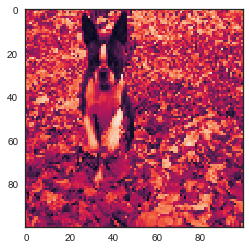


  0%|          | 1/10222 [00:00<18:57,  8.98it/s]

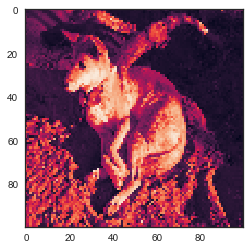

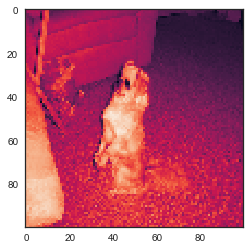


  0%|          | 3/10222 [00:00<16:35, 10.26it/s]

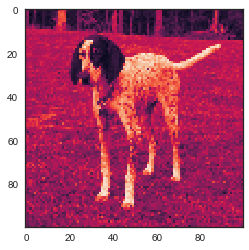

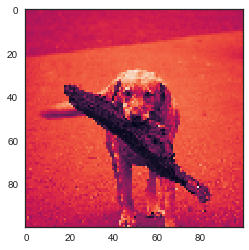


  0%|          | 5/10222 [00:00<16:00, 10.63it/s]

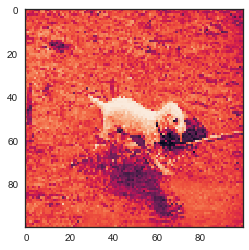

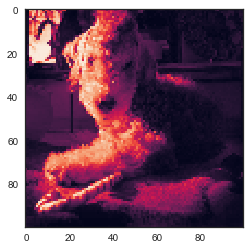


  0%|          | 7/10222 [00:00<15:49, 10.76it/s]

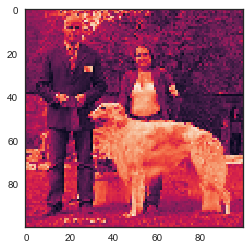

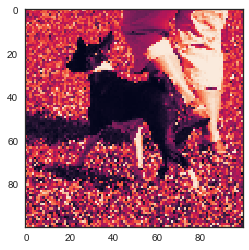


  0%|          | 9/10222 [00:00<15:45, 10.80it/s]

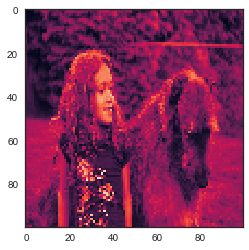


  0%|          | 10/10222 [00:00<16:42, 10.19it/s]

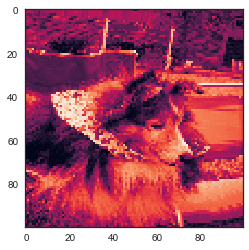


  0%|          | 11/10222 [00:01<16:44, 10.16it/s]

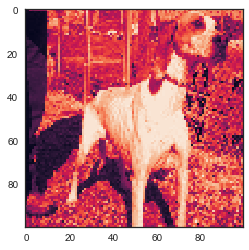

10222


In [46]:
path = "data/dog/train"

IMG_SIZE = 100


def create_training_data():
    i=0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#             img_array = cv2.imread(os.path.join(path,img))
#             plt.imshow(img_array)
#             plt.show()
            
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            plt.imshow(new_array)
            plt.show()

            
        except Exception as e: 
            pass
        if i>10:
            break
        i+=1




create_training_data()

print(len(training_data))

In [47]:
path = "data/dog/train"

training_data = []
IMG_SIZE = 100

In [48]:
def create_training_data():
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            training_data.append([new_array, label_map[img[:-4]]])  
        except Exception as e: 
            pass
        

create_training_data()

print(len(training_data))



  0%|          | 0/10222 [00:00<?, ?it/s]

  0%|          | 26/10222 [00:00<00:39, 256.35it/s]

  0%|          | 42/10222 [00:00<00:50, 201.14it/s]

  1%|          | 57/10222 [00:00<00:55, 183.91it/s]

  1%|          | 75/10222 [00:00<00:55, 181.63it/s]

  1%|          | 91/10222 [00:00<00:57, 176.62it/s]

  1%|          | 107/10222 [00:00<00:58, 172.80it/s]

  1%|          | 122/10222 [00:00<00:59, 169.57it/s]

  1%|▏         | 137/10222 [00:00<01:00, 166.90it/s]

  1%|▏         | 152/10222 [00:00<01:02, 161.91it/s]

  2%|▏         | 167/10222 [00:01<01:02, 160.42it/s]

  2%|▏         | 182/10222 [00:01<01:03, 159.33it/s]

  2%|▏         | 198/10222 [00:01<01:02, 159.15it/s]

  2%|▏         | 214/10222 [00:01<01:02, 159.00it/s]

  2%|▏         | 230/10222 [00:01<01:03, 158.46it/s]

  2%|▏         | 246/10222 [00:01<01:03, 157.91it/s]

  3%|▎         | 265/10222 [00:01<01:02, 159.58it/s]

  3%|▎         | 282/10222 [00:01<01:02, 159.51it/s]

  3%|▎         | 299/10222 [00:01<01:02, 1

 24%|██▍       | 2444/10222 [00:16<00:51, 151.25it/s]

 24%|██▍       | 2460/10222 [00:16<00:51, 151.30it/s]

 24%|██▍       | 2477/10222 [00:16<00:51, 151.40it/s]

 24%|██▍       | 2493/10222 [00:16<00:51, 151.12it/s]

 25%|██▍       | 2508/10222 [00:16<00:51, 150.85it/s]

 25%|██▍       | 2522/10222 [00:16<00:51, 150.62it/s]

 25%|██▍       | 2537/10222 [00:16<00:51, 150.61it/s]

 25%|██▍       | 2552/10222 [00:16<00:50, 150.60it/s]

 25%|██▌       | 2567/10222 [00:17<00:50, 150.55it/s]

 25%|██▌       | 2582/10222 [00:17<00:50, 150.48it/s]

 25%|██▌       | 2598/10222 [00:17<00:50, 150.50it/s]

 26%|██▌       | 2613/10222 [00:17<00:50, 150.45it/s]

 26%|██▌       | 2628/10222 [00:17<00:50, 150.35it/s]

 26%|██▌       | 2643/10222 [00:17<00:50, 150.23it/s]

 26%|██▌       | 2657/10222 [00:17<00:50, 150.13it/s]

 26%|██▌       | 2671/10222 [00:17<00:50, 149.98it/s]

 26%|██▋       | 2685/10222 [00:17<00:50, 149.82it/s]

 26%|██▋       | 2699/10222 [00:18<00:50, 149.67it/s]

 27%|██▋  

 48%|████▊     | 4866/10222 [00:31<00:35, 152.08it/s]

 48%|████▊     | 4882/10222 [00:32<00:35, 152.11it/s]

 48%|████▊     | 4900/10222 [00:32<00:34, 152.18it/s]

 48%|████▊     | 4917/10222 [00:32<00:34, 152.23it/s]

 48%|████▊     | 4934/10222 [00:32<00:34, 152.26it/s]

 48%|████▊     | 4951/10222 [00:32<00:34, 152.28it/s]

 49%|████▊     | 4969/10222 [00:32<00:34, 152.35it/s]

 49%|████▉     | 4986/10222 [00:32<00:34, 152.35it/s]

 49%|████▉     | 5004/10222 [00:32<00:34, 152.41it/s]

 49%|████▉     | 5021/10222 [00:32<00:34, 152.38it/s]

 49%|████▉     | 5040/10222 [00:33<00:33, 152.47it/s]

 49%|████▉     | 5057/10222 [00:33<00:33, 152.39it/s]

 50%|████▉     | 5073/10222 [00:33<00:33, 152.34it/s]

 50%|████▉     | 5088/10222 [00:33<00:33, 152.33it/s]

 50%|████▉     | 5105/10222 [00:33<00:33, 152.37it/s]

 50%|█████     | 5121/10222 [00:33<00:33, 152.37it/s]

 50%|█████     | 5138/10222 [00:33<00:33, 152.40it/s]

 50%|█████     | 5154/10222 [00:33<00:33, 152.37it/s]

 51%|█████

 72%|███████▏  | 7322/10222 [00:47<00:18, 152.66it/s]

 72%|███████▏  | 7339/10222 [00:48<00:18, 152.61it/s]

 72%|███████▏  | 7355/10222 [00:48<00:18, 152.59it/s]

 72%|███████▏  | 7373/10222 [00:48<00:18, 152.64it/s]

 72%|███████▏  | 7389/10222 [00:48<00:18, 152.43it/s]

 72%|███████▏  | 7403/10222 [00:48<00:18, 152.39it/s]

 73%|███████▎  | 7417/10222 [00:48<00:18, 152.32it/s]

 73%|███████▎  | 7435/10222 [00:48<00:18, 152.37it/s]

 73%|███████▎  | 7454/10222 [00:48<00:18, 152.44it/s]

 73%|███████▎  | 7470/10222 [00:49<00:18, 152.05it/s]

 73%|███████▎  | 7484/10222 [00:49<00:18, 151.94it/s]

 73%|███████▎  | 7497/10222 [00:49<00:17, 151.85it/s]

 74%|███████▎  | 7514/10222 [00:49<00:17, 151.88it/s]

 74%|███████▎  | 7529/10222 [00:49<00:17, 151.87it/s]

 74%|███████▍  | 7545/10222 [00:49<00:17, 151.88it/s]

 74%|███████▍  | 7562/10222 [00:49<00:17, 151.90it/s]

 74%|███████▍  | 7577/10222 [00:49<00:17, 151.90it/s]

 74%|███████▍  | 7593/10222 [00:49<00:17, 151.90it/s]

 74%|█████

 94%|█████████▍| 9631/10222 [01:04<00:03, 148.95it/s]

 94%|█████████▍| 9644/10222 [01:04<00:03, 148.92it/s]

 95%|█████████▍| 9660/10222 [01:04<00:03, 148.93it/s]

 95%|█████████▍| 9675/10222 [01:04<00:03, 148.92it/s]

 95%|█████████▍| 9691/10222 [01:05<00:03, 148.93it/s]

 95%|█████████▍| 9707/10222 [01:05<00:03, 148.94it/s]

 95%|█████████▌| 9723/10222 [01:05<00:03, 148.95it/s]

 95%|█████████▌| 9739/10222 [01:05<00:03, 148.95it/s]

 95%|█████████▌| 9755/10222 [01:05<00:03, 148.95it/s]

 96%|█████████▌| 9770/10222 [01:05<00:03, 148.93it/s]

 96%|█████████▌| 9786/10222 [01:05<00:02, 148.95it/s]

 96%|█████████▌| 9802/10222 [01:05<00:02, 148.82it/s]

 96%|█████████▌| 9818/10222 [01:05<00:02, 148.83it/s]

 96%|█████████▌| 9834/10222 [01:06<00:02, 148.84it/s]

 96%|█████████▋| 9851/10222 [01:06<00:02, 148.86it/s]

 97%|█████████▋| 9867/10222 [01:06<00:02, 148.88it/s]

 97%|█████████▋| 9883/10222 [01:06<00:02, 148.86it/s]

 97%|█████████▋| 9898/10222 [01:06<00:02, 148.70it/s]

 97%|█████

10222


In [51]:
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

52
28
12
80
19
106
56
114
29
79


In [52]:
m ={}
for i in range(num_labels):
    m[i]=0
    
for features,label in training_data:
    m[label]+=1


In [157]:
X = []
y = []

for features,label in training_data:
    if label in range(0,16):
        X.append(features)
        y.append(label)
        
print(set(y))
print(len(y))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
1443


In [158]:
y = to_categorical(y, num_classes = 16)

In [159]:
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [160]:
pickle_out = open("data/dog/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("data/dog/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [161]:
pickle_in = open("data/dog/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("data/dog/y.pickle","rb")
y = pickle.load(pickle_in)

In [162]:
X = X/255.0

In [163]:
# Set the random seed
random_seed = 2

In [164]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state=random_seed)

In [165]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (100,100,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation = "softmax"))

In [166]:
# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [167]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [168]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)

In [169]:
epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 32

In [170]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/100
 - 116s - loss: 14.5377 - acc: 0.0773 - val_loss: 15.1177 - val_acc: 0.0621
Epoch 2/100
 - 108s - loss: 14.8612 - acc: 0.0780 - val_loss: 15.1177 - val_acc: 0.0621
Epoch 3/100
 - 120s - loss: 14.7165 - acc: 0.0870 - val_loss: 15.1177 - val_acc: 0.0621
Epoch 4/100
 - 115s - loss: 14.8616 - acc: 0.0780 - val_loss: 15.1177 - val_acc: 0.0621

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 5/100
 - 113s - loss: 14.7921 - acc: 0.0823 - val_loss: 15.1177 - val_acc: 0.0621
Epoch 6/100
